In [ ]:
####https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

In [ ]:
####https://www.zhihu.com/question/55963897

In [11]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 6s 1us/step


8


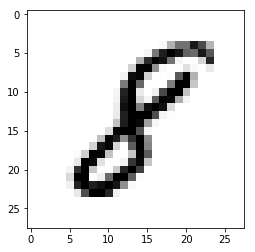

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [14]:

x_train.shape

(60000, 28, 28)

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.2026 - acc: 0.9399
Epoch 2/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.0815 - acc: 0.9752
Epoch 3/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0574 - acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0446 - acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0334 - acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0281 - acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0233 - acc: 0.9922
Epoch 8/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0213 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 16s 258us/step - loss: 0.0187 - acc: 0.9937
Epoch 10/10
60000/60000 [=========

In [18]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 114us/step


[0.06409024233836608, 0.9845]

In [20]:
img = Image.open('7.jpg').convert('L')

In [21]:
arr = []

for i in range(28):
    for j in range(28):
        pixel = 1.0-float(img.getpixel((j,i)))/255.0
        arr.append(pixel)
      

In [22]:
arr1 = np.array(arr).reshape((28,28))



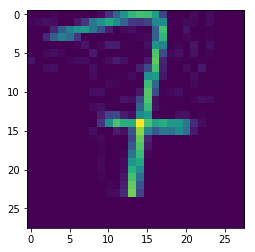

In [23]:
plt.imshow(arr1)

In [26]:
pred = model.predict(arr1.reshape(1, 28,28, 1))

In [27]:
print(pred.argmax())

4


In [28]:
img = Image.open('9.jpg').convert('L')

In [29]:
arr = []

for i in range(28):
    for j in range(28):
        pixel = 1.0-float(img.getpixel((j,i)))/255.0
        arr.append(pixel)
      

In [30]:
arr2 = np.array(arr).reshape((28,28))



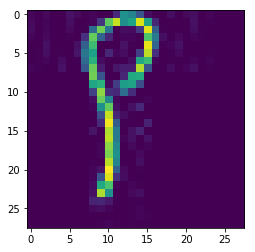

In [31]:
plt.imshow(arr2)

In [32]:
pred2 = model.predict(arr2.reshape(1, 28, 28, 1))

In [33]:
print(pred2.argmax())

6
